# Script to perform data mining on cocoa metabolomic data

Metabolomic data from 20 reaserch articles were collected and organized in a table to perform some comparisons of cocoa composition based on several factors such as geographical origin, cocoa type, processing stage, and so on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
#Upload the data
data = pd.read_excel('Metabolomics.xlsx')
data.head()

,Compound name,Flavor profile,Fine-flavor note,Fine-flavor cocoa,Bulk cocoa,Fermentation,Drying,Roasting,America,Africa,Asia,References
0,1-Hydroxy-2-propanone,Unknown,0,1,1,0,1,1,1,1,0,"1,6"
1,"2,3-Butanedione",buttery,0,1,1,0,1,1,1,1,1,"1,6,8,11"
2,2-Methylpropanoic acid,Unknown,0,0,1,0,1,1,1,0,0,1
3,Pentanal,"bready, fermented, berry, malt, pungent, fruit...",1,0,1,0,1,1,1,0,0,1
4,3-Hydroxy-2-butanone,"Butter, cream",0,1,1,0,1,1,1,1,1,"1,4,6,12"


# 2. Correlation analysis between cocoa type and geographical origin 

Two correlation analysis were performed. The first one evaluate correlation betwenn cocoa types and geographical origin, while the second one compares cocoa processing stages. This analysis was performed to explore the relation between the collected variables

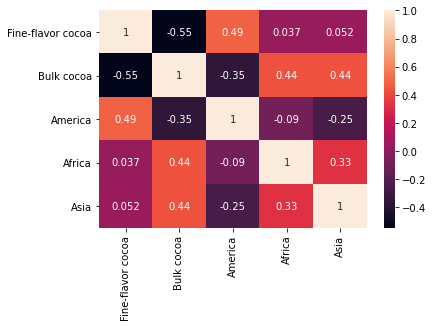

In [13]:
correlation_data = data.drop(['Compound name', 'Flavor profile', 'Fine-flavor note', 'Fermentation', 'Drying', 'Roasting', 'References'], axis=1)
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

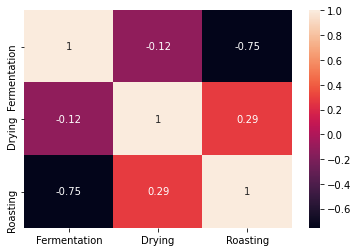

In [14]:
correlation_data1 = data.drop(['Compound name', 'Flavor profile', 'Fine-flavor note', 'Fine-flavor cocoa', 'Bulk cocoa', 'America', 'Africa', 'Asia', 'References'], axis=1)
correlation_matrix1 = correlation_data1.corr()
sns.heatmap(correlation_matrix1, annot = True)
plt.savefig("Figure 3.jpg", dpi=2000)
plt.show()

# 3. Calculating Jaccard Score

According to the sckit-learn Jaccard similarity coefficien is defined as "the size of the intersection divided by the size of the union of two label sets". We used this metric to compare binary vectors. This metric indicates the level of similarity of two sets. The highest the Jaccard score the higher the similarity

In [15]:
import numpy as np
from sklearn.metrics import jaccard_score

#Vectorize all the binary variables    
vector_asia = data ['Asia'].tolist()
vector_america = data ['America'].tolist()
vector_africa = data ['Africa'].tolist()
vector_bulk = data ['Bulk cocoa'].tolist()
vector_fine = data ['Fine-flavor cocoa'].tolist()
vector_fermentation = data ['Fermentation'].tolist()
vector_drying = data ['Drying'].tolist()
vector_roasting = data ['Roasting'].tolist()

#Calculate Jaccard Scores
america_asia = jaccard_score(vector_asia, vector_america)
america_africa = jaccard_score(vector_africa, vector_america)
africa_asia = jaccard_score(vector_africa, vector_asia)

america_fine = jaccard_score(vector_fine, vector_america)
america_bulk = jaccard_score(vector_bulk, vector_america)
africa_bulk = jaccard_score(vector_bulk, vector_africa)
africa_fine = jaccard_score(vector_fine, vector_africa)
asia_bulk = jaccard_score(vector_bulk, vector_asia)
asia_fine = jaccard_score(vector_fine, vector_asia)

fermentation_drying = jaccard_score(vector_fermentation, vector_drying)
fermentation_roasting = jaccard_score(vector_fermentation, vector_roasting)
drying_roasting = jaccard_score(vector_drying, vector_roasting)

#print the results
print ('america_asia: ', america_asia)
print ('america_africa: ', america_africa)
print ('africa_asia: ', africa_asia)
print ('america_fine: ', america_fine)
print ('america_bulk: ', america_bulk)
print ('africa_bulk: ', africa_bulk)
print ('africa_fine: ', africa_fine)
print ('asia_bulk: ', asia_bulk)
print ('asia_fine: ', asia_fine)
print ('fermentation_drying: ', fermentation_drying)
print ('fermentation_roasting: ', fermentation_roasting)
print ('drying_roasting: ', drying_roasting)

america_asia:  0.24205748865355523
america_africa:  0.2620904836193448
africa_asia:  0.36538461538461536
america_fine:  0.7851373182552503
america_bulk:  0.42857142857142855
africa_bulk:  0.45083932853717024
africa_fine:  0.27697841726618705
asia_bulk:  0.4655581947743468
asia_fine:  0.296229802513465
fermentation_drying:  0.19206680584551147
fermentation_roasting:  0.11208151382823872
drying_roasting:  0.39400428265524623


# 4.Flavor profile of the collected molecules

Some statistics about the sensorial profile of the known molecules. Also the molecules weure classified acording to the sensorial profile they had: wether it was fine-flavor or not. For the molecules with fine-flavor profile was extracted the types of molecules based on the nomenclature

In [16]:
Flavor_profile = data ['Flavor profile'].tolist()

unknown_flavor = 0

#Find the number of molecules without flavor profile
for i in Flavor_profile: 
    if i == 'Unknown': 
        unknown_flavor += 1
    else: 
        pass
    
# Find the total number of compound
total_compounds = data.shape[0]

#Calculate the percentage of molecules without flavor profile
percentage_unknown = (unknown_flavor / total_compounds) * 100

#print the results
print (unknown_flavor, 'molecules do not have a known flavor profile')
print ('These molecules represent the', percentage_unknown, ' % of the collected data')


347 molecules do not have a known flavor profile
These molecules represent the 49.57142857142857  % of the collected data


In [17]:
Fine_flavor = data ['Fine-flavor note'].tolist()

compound_list = data ['Compound name'].tolist()

Fine_note = 0

Fine_flavor_molecules = []

count = 0

#Find the number of molecules with fine-flavor notes
for i in Fine_flavor: 
    if i == 1: 
        Fine_note += 1
        molecule = compound_list [count]
        Fine_flavor_molecules.append(molecule)
    else: 
        pass
    
    count += 1

# Calculate the percentage of moleculeswith fine-flavor notes
percentage_fine = (Fine_note / data.shape[0]) * 100

#print the results
print (Fine_note, 'add fine-flavor notes to the cocoa')
print ('These molecules represent the', percentage_fine, ' % of the collected data')

215 add fine-flavor notes to the cocoa
These molecules represent the 30.714285714285715  % of the collected data


# 5. Discriminating fine-flavor molecules by type

In order to know the types of molecules linked to fine-flavor notes in cocoa, we extracted the molecule type using the IUPAC nomenclature and extracting the molecule type from the name

In [18]:
#This function return the amount of molecules of each type in a list
def compound_type(list_of_molecules):
    
    Pyrazines = 0
    Aldehydes = 0
    Esters = 0
    Alcohols = 0
    Ketones = 0
    Acids = 0
    Other = 0
    
    for i in list_of_molecules: 
        
        # Get the lenth of the compound name
        compound = i
        length = len(compound) 
        
        #Find Pyrazines
        if compound[length - 8 :] == 'pyrazine':
            Pyrazines += 1
        
        #Find Aldehydes
        elif compound[length - 6 :] == 'dehyde' or compound[length - 3 :] == 'nal':
            Aldehydes += 1  
        
        #Find Esters
        elif compound[length - 3 :] == 'ate':
            Esters += 1 
        
        #Find Alcohols
        elif compound[length - 2 :] == 'ol':
            Alcohols += 1
        
        #Find Ketones
        elif compound[length - 3 :] == 'one':
            Ketones += 1
        
        #Find Acids
        elif compound[length - 4 :] == 'acid':
            Acids += 1
        
        else: 
            Other += 1
            
    return  (Esters, Alcohols, Aldehydes, Pyrazines, Ketones, Acids)
    
    #Print the results
    #print ('Pyrazines= ', Pyrazines)
    #print ('Aldehydes= ', Aldehydes)
    #print ('Alcohols= ', Alcohols)
    #print ('Esters= ', Esters)
    #print ('Ketones= ', Ketones)
    #print ('Acids= ', Acids)
    #print ('Other= ', Other)

Text(0, 0.5, 'Amount of molecules')

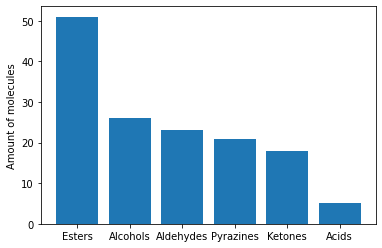

In [19]:
#Find the type of molecule
fine_flavor_type = compound_type (Fine_flavor_molecules)

#Plot the results
y = ['Esters', 'Alcohols', 'Aldehydes', 'Pyrazines', 'Ketones', 'Acids']
plt.bar(y, fine_flavor_type)
plt.ylabel('Amount of molecules')

# 6. Cocoa type composition
A comparison of bulk and fine flavor cocoa was performed based only on the presence or absence of the collected molecules. For each cocoa type was obteined the number of molecules with fine-flavor notes

In [20]:
#Compare the composition of each cocoa type
fine = data ['Fine-flavor cocoa'].tolist()
bulk = data ['Bulk cocoa'].tolist()
compound_list = data ['Compound name'].tolist()

only_fine = []
count_fine = 0
only_bulk = []
count_bulk = 0
both_types = []
count_both = 0
index = 0

for i in fine: 
    bulk_presence = bulk[index]
    molecule = compound_list[index]
    
    #Find molecules present in both cocoa type
    if i == 1 and bulk_presence == 1: 
        count_both += 1
        both_types.append(molecule)
    
    #Find molecules present only in fine-flavor cocoa
    elif i == 1 and bulk_presence == 0: 
        count_fine += 1
        only_fine.append(molecule)
    
    #Find molecules present only in bulk cocoa
    else: 
        count_bulk += 1
        only_bulk.append(molecule)
    index += 1

#Print the results
print (count_fine, 'molecules have been adentified only in fine-flavor cocoa')
print (count_bulk, 'molecules have been adentified only in bulk cocoa')
print (count_both, 'molecules are present in both cocoa type')

302 molecules have been adentified only in fine-flavor cocoa
197 molecules have been adentified only in bulk cocoa
201 molecules are present in both cocoa type


Text(0, 0.5, 'Amount of molecules')

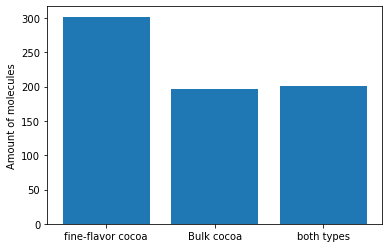

In [21]:
#Plot the results of cocoa composition by type
Z = ['fine-flavor cocoa', 'Bulk cocoa', 'both types']
list_count = [count_fine, count_bulk, count_both]
plt.bar(Z, list_count)
plt.ylabel('Amount of molecules')

Text(0, 0.5, 'Amount of molecules')

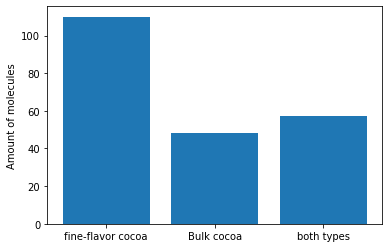

In [22]:
#Find fine-flavor molecules in fine-flavor cocoa
fine_molecules_in_fine = list(set( only_fine).intersection(Fine_flavor_molecules))
amount_fine = len(fine_molecules_in_fine)

#Find fine-flavor molecules in bulk cocoa
fine_molecules_in_bulk = list(set( only_bulk).intersection(Fine_flavor_molecules))
amount_bulk = len(fine_molecules_in_bulk)

#Find fine flavor molecules in both cocoa types
fine_molecules_in_both = list(set( both_types).intersection(Fine_flavor_molecules))
amount_both = len(fine_molecules_in_both)

#Plot the results
b = ['fine-flavor cocoa', 'Bulk cocoa', 'both types']
list_amounts = [amount_fine, amount_bulk, amount_both]
plt.bar(b, list_amounts)
plt.ylabel('Amount of molecules')

# 7. Characteristic molecules for processing stage

To performed this analysis, we compared the binary vectors corresponding to each processing stage. with thsi we obtained molecules arising during processing and molecules remaining in cocoa beans during processing

Text(0, 0.5, 'Amount of molecules')

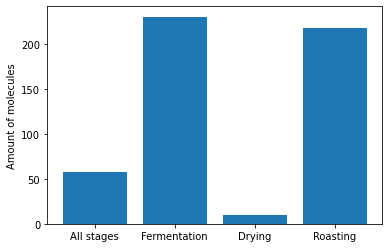

In [23]:
#Find molecules for stage
Fermentation = data ['Fermentation'].tolist()
Drying = data ['Drying'].tolist()
Roasting = data ['Roasting'].tolist()

Fermentation_mol = []
Drying_mol = []
Roasting_mol = []
All_stages = []

index = 0

for i in Fermentation: 
    
    dry = Drying[index]
    roast = Roasting[index]
    mol = compound_list[index]

    #Find unique molecules for fermentation
    if i == 1 and dry == 0 and roast == 0:
        Fermentation_mol.append(mol)
    
    #Find unique molecules for drying
    elif i == 0 and dry == 1 and roast == 0:
        Drying_mol.append(mol)
    
    #Find unique molecules for roasting   
    elif i == 0 and dry == 0 and roast == 1:
        Roasting_mol.append(mol)
    
    #Find conserve molecules
    elif i == 1 and dry == 1 and roast == 1:
        All_stages.append(mol)
        
    index += 1

#Plot the results
d = ['All stages', 'Fermentation', 'Drying', 'Roasting']
list_stages = [len(All_stages), len(Fermentation_mol), len(Drying_mol), len(Roasting_mol)]
plt.bar(d, list_stages)
plt.ylabel('Amount of molecules')


Text(0, 0.5, 'Amount of molecules')

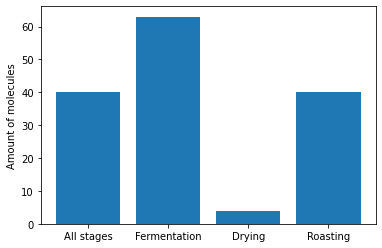

In [24]:
#Find fine-flavor molecules in fermentation
fine_molecules_in_fermentation = list(set(Fermentation_mol).intersection(Fine_flavor_molecules))
fermentation_fine = len(fine_molecules_in_fermentation)

#Find fine-flavor molecules in drying
fine_molecules_in_drying= list(set(Drying_mol).intersection(Fine_flavor_molecules))
drying_fine = len(fine_molecules_in_drying)

#Find fine flavor molecules in roasting
fine_molecules_in_roasting = list(set(Roasting_mol).intersection(Fine_flavor_molecules))
roasting_fine = len(fine_molecules_in_roasting)

#Find fine flavor molecules in all stages
fine_molecules_in_all = list(set(All_stages).intersection(Fine_flavor_molecules))
All_fine = len(fine_molecules_in_roasting)

#Plot the results
e = ['All stages', 'Fermentation', 'Drying', 'Roasting']
list_stages_fine = [All_fine, fermentation_fine, drying_fine, roasting_fine]
plt.bar(e, list_stages_fine)
plt.ylabel('Amount of molecules')

# 8. Geographical origin

In this section we compared the geographical origin and the presence or absence of molecules depending on this variable. We also analyzed the presence of molecules with fine-flavor notes by region

Text(0, 0.5, 'Amount of molecules')

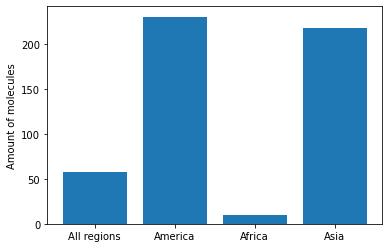

In [25]:
#Find molecules for stage
America = data ['America'].tolist()
Africa = data ['Africa'].tolist()
Asia = data ['Asia'].tolist()

America_mol = []
Asia_mol = []
Africa_mol = []
All_regions = []

index = 0

for i in America: 
    
    Asia_presence = Asia [index]
    Africa_presence = Africa [index]
    mol_region = compound_list[index]

    #Find unique molecules for America
    if i == 1 and Asia_presence == 0 and Africa_presence == 0:
        America_mol.append(mol_region)
    
    #Find unique molecules for Asia
    elif i == 0 and Asia_presence == 1 and Africa_presence == 0:
        Asia_mol.append(mol_region)
    
    #Find unique molecules for Africa   
    elif i == 0 and Asia_presence == 0 and Africa_presence == 1:
        Africa_mol.append(mol_region)
    
    #Find molecules in all regions
    else:
        All_regions.append(mol)
        
    index += 1

#Plot the results
f = ['All regions', 'America', 'Africa', 'Asia']
list_regions = [len(All_regions), len(America_mol), len(Africa_mol), len(Asia_mol)]
plt.bar(f, list_stages)
plt.ylabel('Amount of molecules')


Text(0, 0.5, 'Amount of molecules')

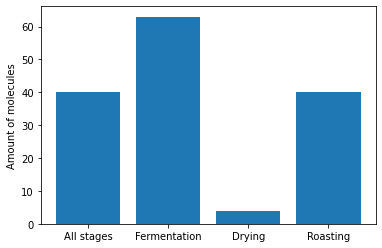

In [26]:
#Find fine-flavor molecules in America
fine_molecules_in_america = list(set(America_mol).intersection(Fine_flavor_molecules))
america_fine = len(fine_molecules_in_america)

#Find fine-flavor molecules in Asia
fine_molecules_in_asia= list(set(Asia_mol).intersection(Fine_flavor_molecules))
asia_fine = len(fine_molecules_in_asia)

#Find fine flavor molecules in Africa
fine_molecules_in_Africa = list(set(Roasting_mol).intersection(Fine_flavor_molecules))
roasting_fine = len(fine_molecules_in_roasting)

#Find fine flavor molecules in all stages
fine_molecules_in_all = list(set(All_stages).intersection(Fine_flavor_molecules))
All_fine = len(fine_molecules_in_roasting)

#Plot the results
e = ['All stages', 'Fermentation', 'Drying', 'Roasting']
list_stages_fine = [All_fine, fermentation_fine, drying_fine, roasting_fine]
plt.bar(e, list_stages_fine)
plt.ylabel('Amount of molecules')